# Titanic : Exploratory Data Analysis

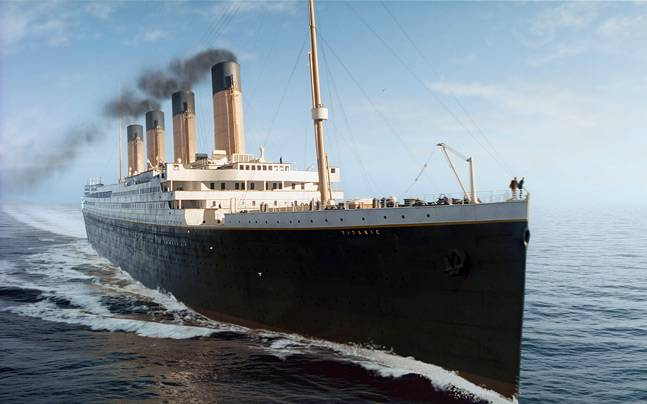

## Introduction

 The titanic.csv. file contains data for 887 of the real Titanic passengers. Each row represents one person.

### Data Field Explanation
The columns describe different attributes about the person in the Titanic ship :

* **Survived** - Number of people survived 
* **Pclass** - Passenger class
* **Name** - Passenger Name
* **Sex** - Gender of each Passenger
* **Age** - Age of each passenger
* **Siblings/Spouses Aboard** - Siblings/Spouses count of Passenger Aboard Titanic
* **Parents/Children Aboard** - parents/Children count of Passenger Aboard Titanic
* **Fare** - Fare paid by passenger in £s

## Objective
Analysing the data & plot the required graphs to answer the following questions:

* Did age affect the survival rate of the passengers?
* Does survival rate very with the gender of the person?
* If females had higher survivate rate, did it vary with their class ?
* Did passenger class pay a role in survival rates?

## Loading the data 

In [1]:
## Importing pandas to read the csv file.
import pandas as pd

df=pd.read_csv('titanic.csv')
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [3]:
# First 5 rows of the titanic dataframe
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [4]:
# Observing the lables of each column
print(df.keys())

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')


In [5]:
#Observing the shape of our data frame.
df.shape

(887, 8)

**Note** : Return a tuple representing the dimensionality of the DataFrame

## Checking missing values 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.5+ KB


In [7]:
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

**Note** : Above observation shows that the data does not have any missing values.

# Univariate Analysis

### CountPlot and KDE 

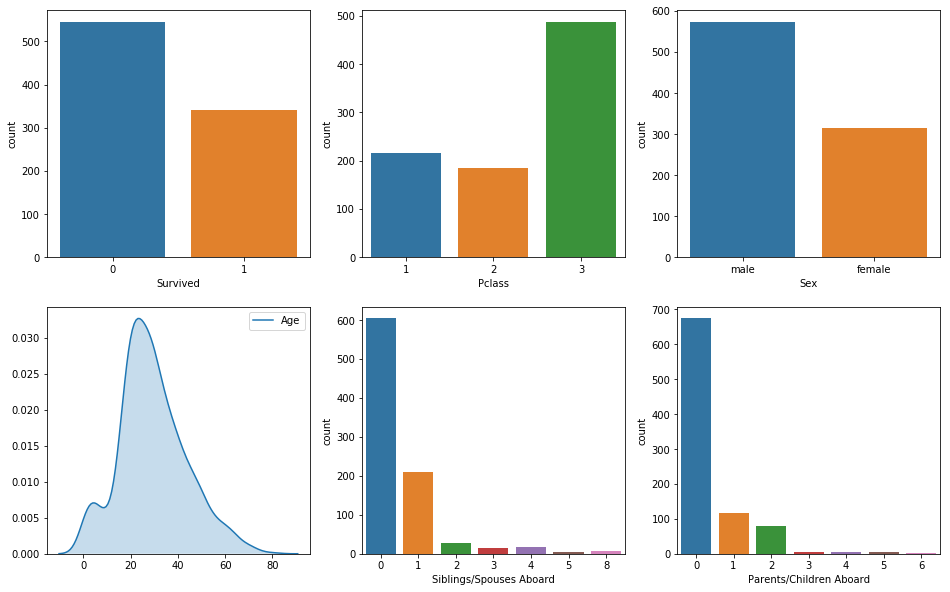

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

fig,axes =plt.subplots(2,3,figsize=(16,10))
sns.countplot('Survived',data=df,ax=axes[0,0])
sns.countplot('Pclass',data=df,ax=axes[0,1])
sns.countplot('Sex',data=df,ax=axes[0,2])
sns.kdeplot(df['Age'],shade=True,ax=axes[1,0])
sns.countplot('Siblings/Spouses Aboard',data=df,ax=axes[1,1])
sns.countplot('Parents/Children Aboard',data=df,ax=axes[1,2])

**Note** : A count plot show the counts of observations in each categorical bin using bars.

**OBSERVATION:**
* There are more people that could not survived as compared to the ones that survived.
* Maximum people were from the age group of 20-45 years
* More male passengers were present as compared to the females.
* Majority of people travelled in 3rd Class

## Finding Outliers

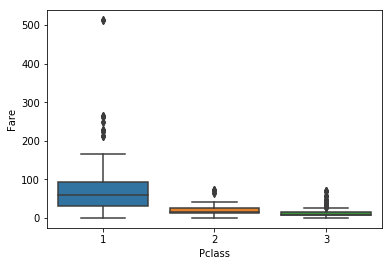

In [12]:
#From univariate analysis, we deduced that outliers may be present in Fare or Age columns
sns.boxplot(x='Pclass',y='Fare',data=df)

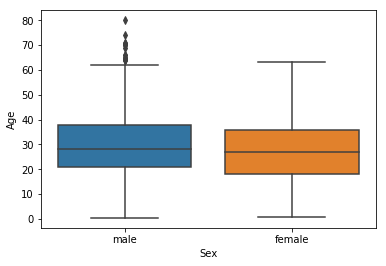

In [13]:
sns.boxplot(x='Sex',y='Age',data=df)

**Observations**: 
* Since, age can go upto 80 we don't treat is as an outlier. 


In [18]:
df[df.Fare>500]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
257,1,1,Miss. Anna Ward,female,35.0,0,0,512.3292
676,1,1,Mr. Thomas Drake Martinez Cardeza,male,36.0,0,1,512.3292
733,1,1,Mr. Gustave J Lesurer,male,35.0,0,0,512.3292


**Observation:** There are high chances of these 3 data points being outliers since their fare seem extremely high in comparison to their counterpart passengers.

# Bivariate Analysis 

### Checking if Survival rate depended on Class 

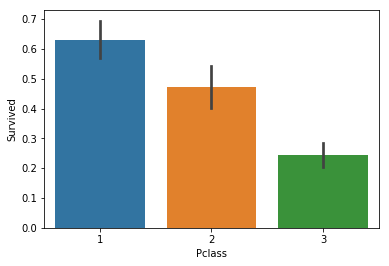

In [28]:
sns.barplot(x='Pclass', y='Survived', data=df)

In [19]:
pd.crosstab(df['Pclass'], df['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,368,119,487
All,545,342,887


**Observation : Above output states following observations**

* For 1st class passengers - survival rate is 62.96%
* For 2nd class passengers - survival rate is 47.28% 
* For 3rd class passengers - survival rate is 24.43% 

**People travelling first class i.e. rich people had higher survival rates than other passengers and were given higher priority** 

### Checking if Survival rate depended on Age

[(10, 100)]

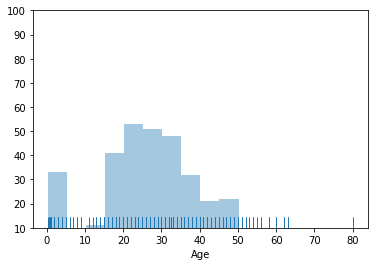

In [46]:
survived = df[df['Survived'] == 1 ]['Age']
not_survived = df[df['Survived'] == 0 ]['Age']
ax = sns.distplot(survived, kde=False, rug=True)
ax.set(ylim=(10, 100))

[(10, 100)]

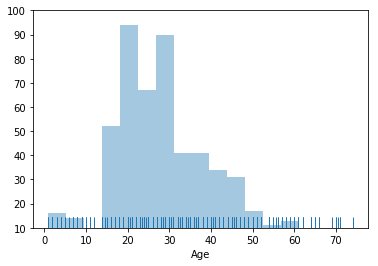

In [47]:
ax = sns.distplot(not_survived, kde=False, rug=True)
ax.set(ylim=(10, 100))

**Observation**:
On analysing the two histograms we deduce that age has no clear effect on the Survival rate, but more infants and children survived in the crash. Children might have been given lifeboats.

### Checking if Survival rate depended on Gender

In [48]:
pd.crosstab(df['Sex'], df['Survived'], margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,464,109,573
All,545,342,887


**Observation :**

* Out of 314 females,233 survived which shows 74.20% females survived
* Out of 573 males 109 survived which shows 19.02% males survived

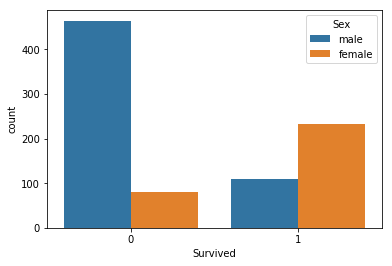

In [50]:
sns.countplot(x='Survived', data=df, hue='Sex')

**Observation:**
Clearly, females were given priority as compared to men.

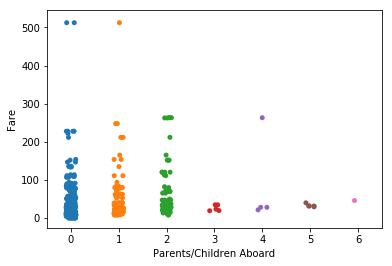

In [51]:
sns.stripplot(x="Parents/Children Aboard", y="Fare",data=df)

**Observation :**
Generally many people did not travel with parents or children, although there seems to be a 'weak' pattern of low fares with more children than higher ones

#### We know that female survival rate is higher, checking if it varies with class

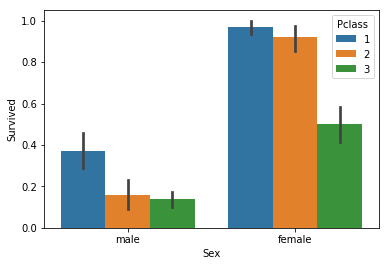

In [52]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df)

**Observation:** Survival rate of females in first class is higher as compared to lower classes. 

# Multivariate Analysis

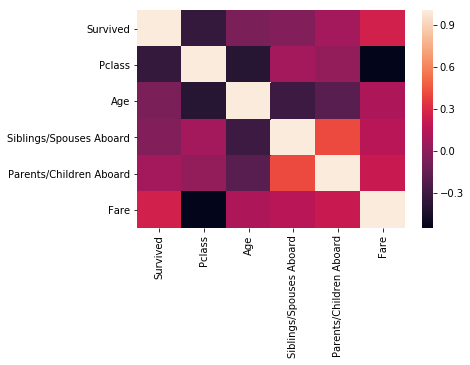

In [53]:
cor_mat = df.corr()

sns.heatmap(cor_mat)

**Observation :**

* There is a positve co-relation between Fare and Survived
* Negative co-relation between Pclass and Survived
* Negative co-relation between Pclass and Fare, Age and Pclass

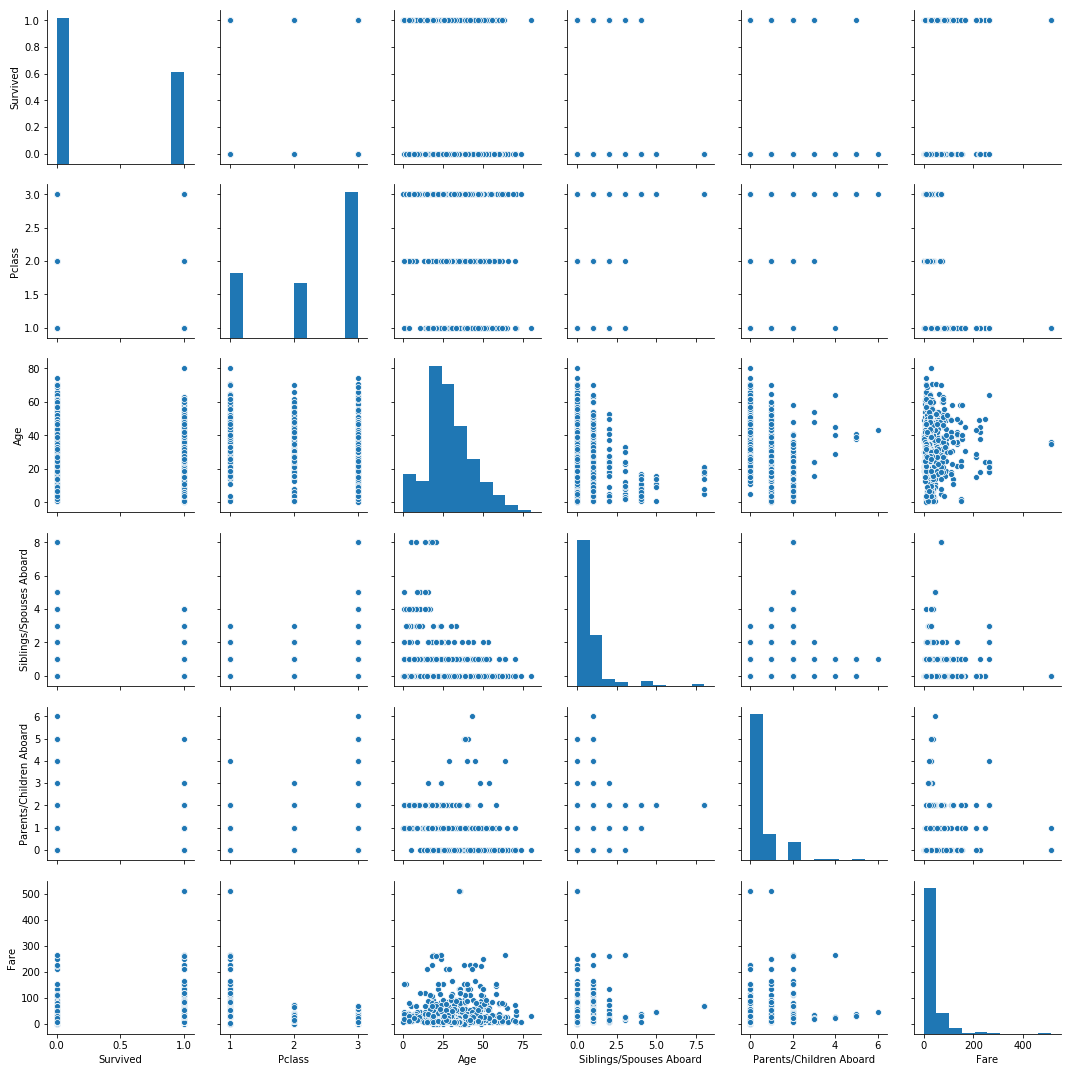

In [54]:
sns.pairplot(df)

# Final Plots

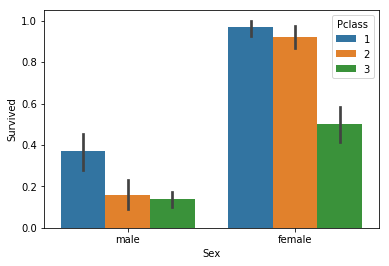

In [55]:
sns.barplot(x='Sex', y='Survived', hue='Pclass',data= df)

**Reasoning** : Above Observation gives clarity about the fact that Survival rate for females in 1st class is more and Survival rate of females is much higher as compared to males

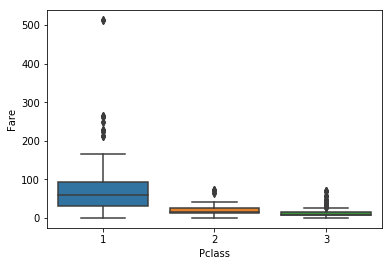

In [56]:
sns.boxplot(x='Pclass',y='Fare',data=df)

**Reasoning** : This Observation shows different class passengers have different fares and variability in fare for first class passengers is showing more existence of some outliers

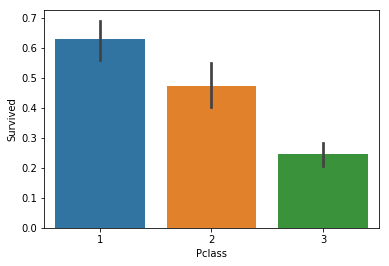

In [61]:
sns.barplot(x='Pclass', y='Survived',data=df)

**Reasoning** : Above Observation shows that first class people were given preference of lifeboats.

# Summary

* Pclass and Sex determine Survival rates strongly.
* Survival rate of females is much higher as compared to males and Survival rate for females in 1st class is more than lower classes.
* For the majority of data, age has no effect on survival rate. But, among children and infants have shown high survival rates i.e. major access to life boats.
* Different class passengers have different fares and Fares for 1st class passengers are the highest.
* There seems to be a 'weak' pattern of low fares with more children than higher ones.